In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#!pip install ipdb

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS     = 10
BATCH_SIZE = 64

In [ ]:
fmnist_transform=transforms.Compose([
                       transforms.ToTensor()
                   ])

In [ ]:
trainset = datasets.FashionMNIST(
    root      = '../data/', 
    train     = True,
    download  = True,
    transform = fmnist_transform
)
testset = datasets.FashionMNIST(
    root      = '../data/', 
    train     = False,
    download  = True,
    transform = fmnist_transform
)

In [ ]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE, shuffle=True
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE, shuffle=True
)

In [ ]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

(28, 28)


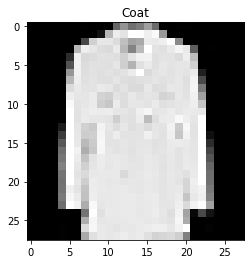

In [ ]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## CNN을 이용해 Fashion MNIST 분류문제를 풀어봅시다

In [ ]:
class Net(nn.Module):
    def __init__(self):
      #######################
      #CNN 모델을 작성하시오#
      #######################

    def forward(self, x):
      #######################
      #CNN 모델을 작성하시오#
      #######################
        return x

In [ ]:
model     = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313455
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.750736
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.524439
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.479342
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.370100
[1] Test Loss: 0.5587, Accuracy: 80.06%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.354630
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.382302
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.430707
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.399994
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.360221
[2] Test Loss: 0.4460, Accuracy: 83.74%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.434502
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.245335
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.302072
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.356381
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.404285
[3] Test Loss: 0.3607, Accuracy: 86.92%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.313764
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.444483
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.317615


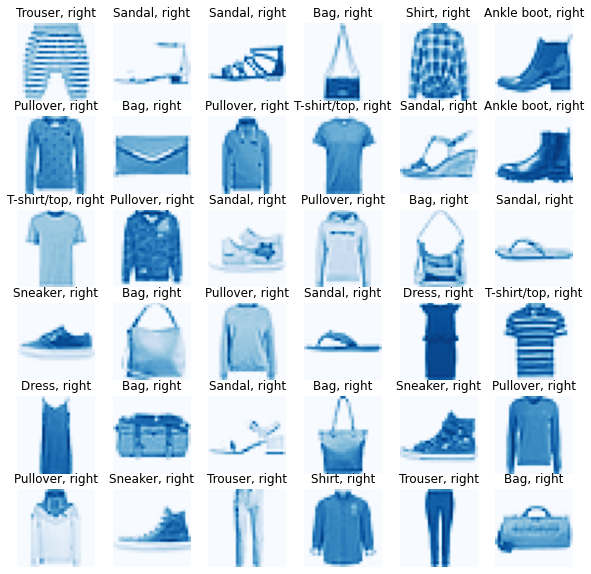

In [ ]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 